<a href="https://colab.research.google.com/github/19marquee/rabbit-challenge/blob/main/machine-learning/algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポート 機械学習/k近傍法、k-means


## 100文字以内の要点のまとめ

ｋ近傍法（ｋＮＮ）

- 分類問題のための機械学習手法で、教師あり学習に含まれる。
- 分類したい点の近傍からＫ個の点をとり、それらがももっとも多く所属するクラスに識別。
- Ｋを大きくすると決定境界は滑らかになる。

ｋ平均法（ｋ－ｍｅａｎｓ）

- 特徴の似ているデータ同士をグループ化するクラスタリング手法の一種で、教師なし学習に含まれる。
- 与えられたデータをｋ個のクラスタに分類する。
- kの値や中心の初期値はハイパーパラメータで、各値を変えるとクラスタリング結果も変化する。

##実習演習結果

### k近傍法

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### 訓練データ生成

訓練データを生成し、プロット

In [38]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

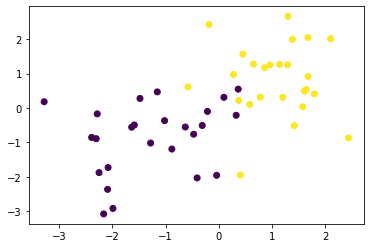

In [39]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

#### 学習

k近傍法に、コードの形での陽な学習ステップはない。

#### 予測

予測するデータ点との、距離が最も近い$k$個の、訓練データのラベルの最頻値を割り当てる

In [40]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

決定境界をプロット

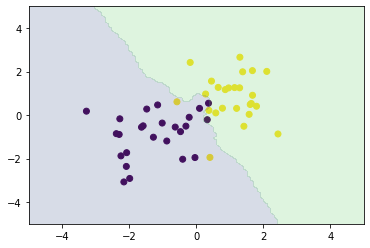

In [41]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

#### numpy実装

kの値を3から6に変えると、決定境界が滑らかになった。

In [42]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

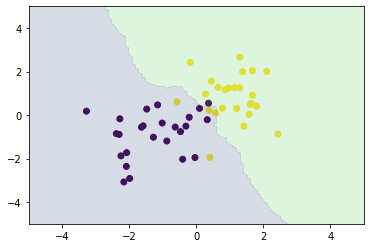

In [43]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 6
knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, ys_train)
plt_resut(X_train, ys_train, knc.predict(xx))

### k平均クラスタリング(k-means)

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#### データ生成

データを生成し、プロット

In [45]:
def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))

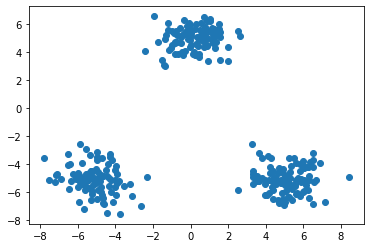

In [46]:
#データ作成
X_train = gen_data()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

#### 学習

k-meansアルゴリズムは以下のとおりである

1) 各クラスタ中心の初期値を設定する

2) 各データ点に対して、各クラスタ中心との距離を計算し、最も距離が近いクラスタを割り当てる

3) 各クラスタの平均ベクトル（中心）を計算する

4) 収束するまで2, 3の処理を繰り返す

In [47]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 3
iter_max = 100

# 各クラスタ中心をランダムに初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

#### クラスタリング結果

In [48]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')

In [49]:
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

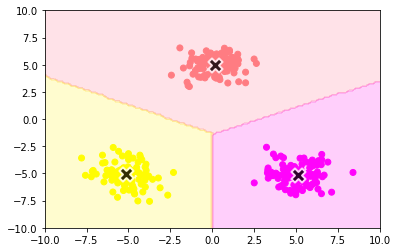

In [50]:
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

#### numpy実装

クラスタ数を4に変更して実施すると、データのかたまりの内、一つを無理やりクラスタリングしてしまう。

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)

In [52]:
print("labels: {}".format(kmeans.labels_))
print("cluster_centers: {}".format(kmeans.cluster_centers_))
kmeans.cluster_centers_

labels: [1 3 3 3 3 1 3 3 3 1 1 3 3 1 3 3 3 1 1 1 1 3 1 1 1 1 3 1 1 3 3 1 1 3 3 1 1
 1 3 1 3 1 1 1 1 1 3 1 1 1 3 1 1 1 1 3 3 1 3 1 1 3 1 3 1 1 3 1 1 3 3 1 3 3
 3 3 3 1 3 1 1 3 1 1 1 1 3 3 1 1 3 1 1 3 3 3 3 1 1 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
cluster_centers: [[ 0.20306244  4.97638802]
 [-5.67003774 -4.51143068]
 [ 5.11560099 -5.11082118]
 [-4.47190861 -5.76227371]]


array([[ 0.20306244,  4.97638802],
       [-5.67003774, -4.51143068],
       [ 5.11560099, -5.11082118],
       [-4.47190861, -5.76227371]])

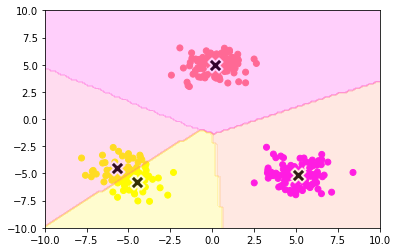

In [53]:
plt_result(X_train, kmeans.cluster_centers_, xx)